In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pi = np.pi
cos = np.cos
sin = np.sin
exp = np.exp

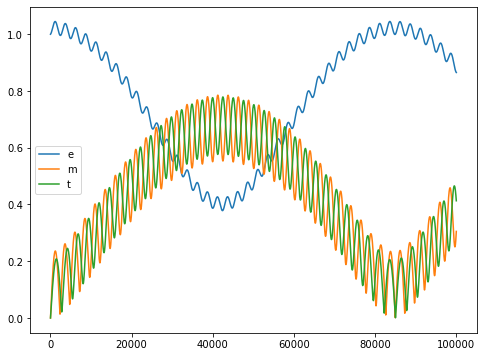

In [4]:
theta12 = np.radians(33.44)
theta23 = np.radians(49.0)
theta13 = np.radians(8.57)
deltaCP = np.radians(195) #data from NuFIT.org

c12 = cos(theta12)
s12 = sin(theta12)
c13 = cos(theta13)
s13 = sin(theta13)
c23 = cos(theta23)
s23 = sin(theta23)

U = np.array([[c12*c13            , s12*c13             , s13*exp(0-1j*deltaCP)],
             [-s12*c23-c12*s23*s13, c12*c23-s12*s23*s13 , s23*c13 ],
             [s12*s23-c12*c23*s13 , -c12*s23-s12*c23*s13, c23*c13 ]])

iU = np.linalg.inv(U)

E = 1
e_survival = []
mu_survival = []
tau_survival = []
time = np.linspace(0,100000,10001)
for t in time:

    flavor_initial = [1,0,0] #change here to start with e/m/t neutrino

    energy_initial = iU.dot(flavor_initial)

    f1 = 0
    f2 = 7.42*10**(-5)/E
    f3 = 2.514*10**(-3)/E
    
    evolution = np.array([[exp(0-1j*f1*t),0,0],[0,exp(0-1j*f2*t),0],[0,0,exp(0-1j*f3*t)]])
    
    energy = evolution.dot(energy_initial)
    flavor = U.dot(energy)
    e_survival.append(np.absolute(flavor[0]))
    mu_survival.append(np.absolute(flavor[1]))
    tau_survival.append(np.absolute(flavor[2]))
    
fig = plt.figure(figsize=(8,6))
plt.plot(time,e_survival,label='e')
plt.plot(time,mu_survival,label='m')
plt.plot(time,tau_survival,label='t')
plt.legend()
plt.show()

So generally, the kind of matrices that we will be applying on the qutrit are:

1. Prepare initial flavor state, generally setting it at [1,0,0] for electron neutrino, but we can change that
2. iU: the inverse of PMNS matrix, to change to mass basis
3. evolution: unitary evolution through time
4. U: PMNS matrix, to switch back to flavor basis
5. Measure the state to get survival probabilities